## Programming Project Solutions

### Problem 1

#### (a)

The function is:
\begin{equation*}
    f(x_1, x_2) = x_1^2 + 3x_1x_2 + 9x_2^2 +2x_1 -5x_2
\end{equation*}

The plot is below.

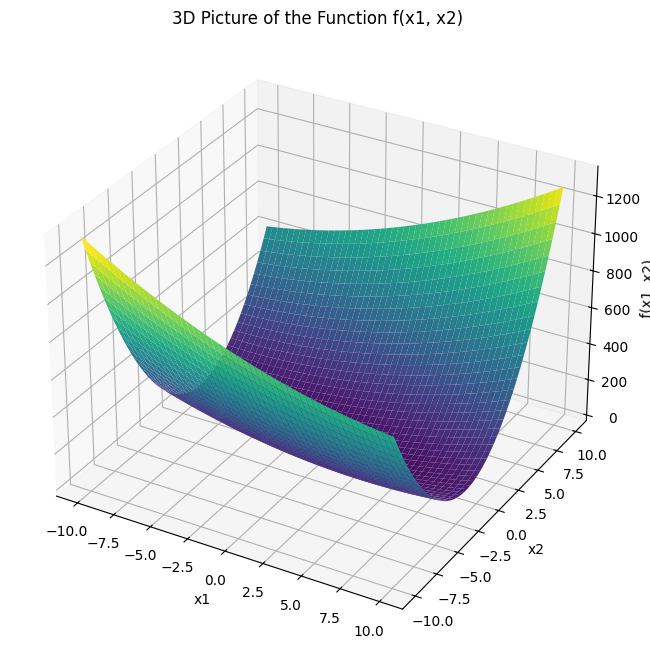

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# NOTE: Use "Run All" button to get this seed
np.random.seed(0)

def f(x1, x2):
    return x1**2 + 3 * x1 * x2 + 9 * x2**2 + 2 * x1 - 5 * x2

# Set the limits and get z values using meshgrid
lims = (-10, 10)
x1 = np.linspace(lims[0], lims[1], 1000)
x2 = np.linspace(lims[0], lims[1], 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X1, X2, Z, cmap="viridis")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.set_title("3D Picture of the Function f(x1, x2)")
plt.show()

From the plot above, we it appears the function is convex. Below are the curves on the lines going through the point (0, 0) in random directions.

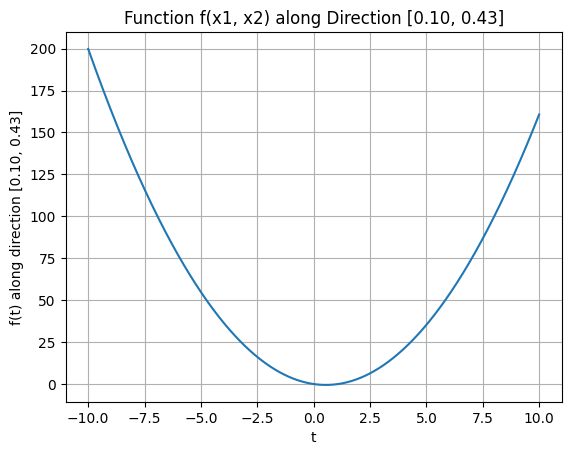

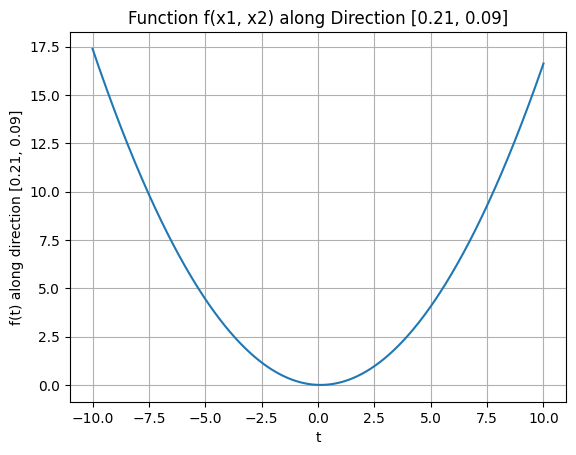

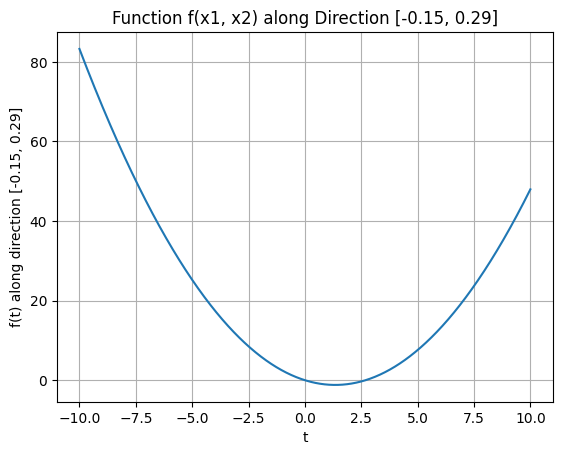

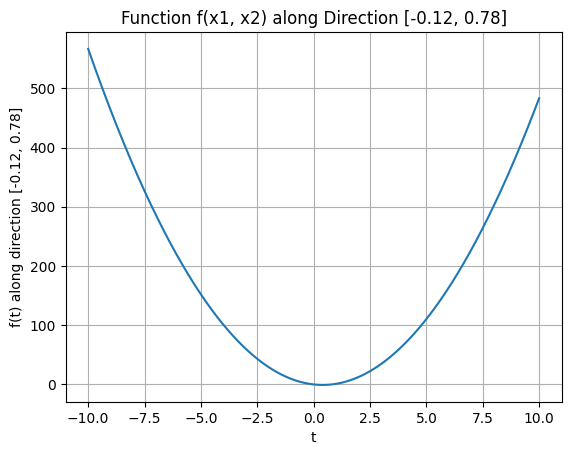

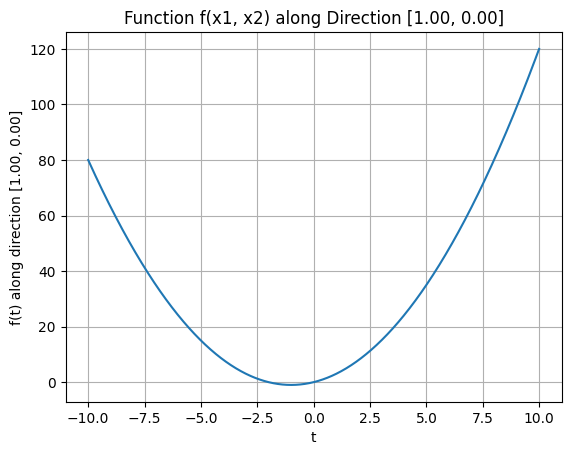

In [162]:
# Plot the function in 2D along a direction that goes through (0, 0)
def dir_f(t, dir_vector):
    x1 = t * dir_vector[0]
    x2 = t * dir_vector[1]
    return f(x1, x2)

# t for plotting and random directions
lims = (-10, 10)
T = np.linspace(lims[0], lims[1], 1000)
directions = np.random.uniform(-1, 1, (5, 2))
directions[-1] = [1, 0]
# Plot along directions
for d in directions:
    f_2d_values = [dir_f(t, d) for t in T]
    plt.plot(T, f_2d_values)
    plt.xlabel("t")
    plt.ylabel(f"f(t) along direction [{d[0]:.2f}, {d[1]:.2f}]")
    plt.title(f"Function f(x1, x2) along Direction [{d[0]:.2f}, {d[1]:.2f}]")
    plt.grid(True)
    plt.show()
    plt.close()

As can be seen above, for all the random directions, the function $f(x_1, x_2)$ restricted to the lines going through the point $(0, 0)$ and in those directions is always convex. 

#### (b)

The gradient of the function is:
\begin{equation*}
    \nabla f(x_1, x_2) = \begin{bmatrix}
        \frac{\partial f(x_1, x_2)}{\partial x_1} \\
        \frac{\partial f(x_1, x_2)}{\partial x_2}
    \end{bmatrix}
    =  \begin{bmatrix}
        2x_1 + 3x_2 + 2 \\
        3x_1 + 18x_2 - 5
    \end{bmatrix}
\end{equation*}

Then, the gradient descent is implemented below. The step sizes (found experimentally are):
- Too small: $\gamma = 0.005$
- Too large: $\gamma = 0.11$
- Just right: $\gamma = 0.05$

Final x for step size 0.005: 1.713, -0.061
Final x for step size 0.05: -1.885, 0.592
Final x for step size 0.11: 10.212, 67.323


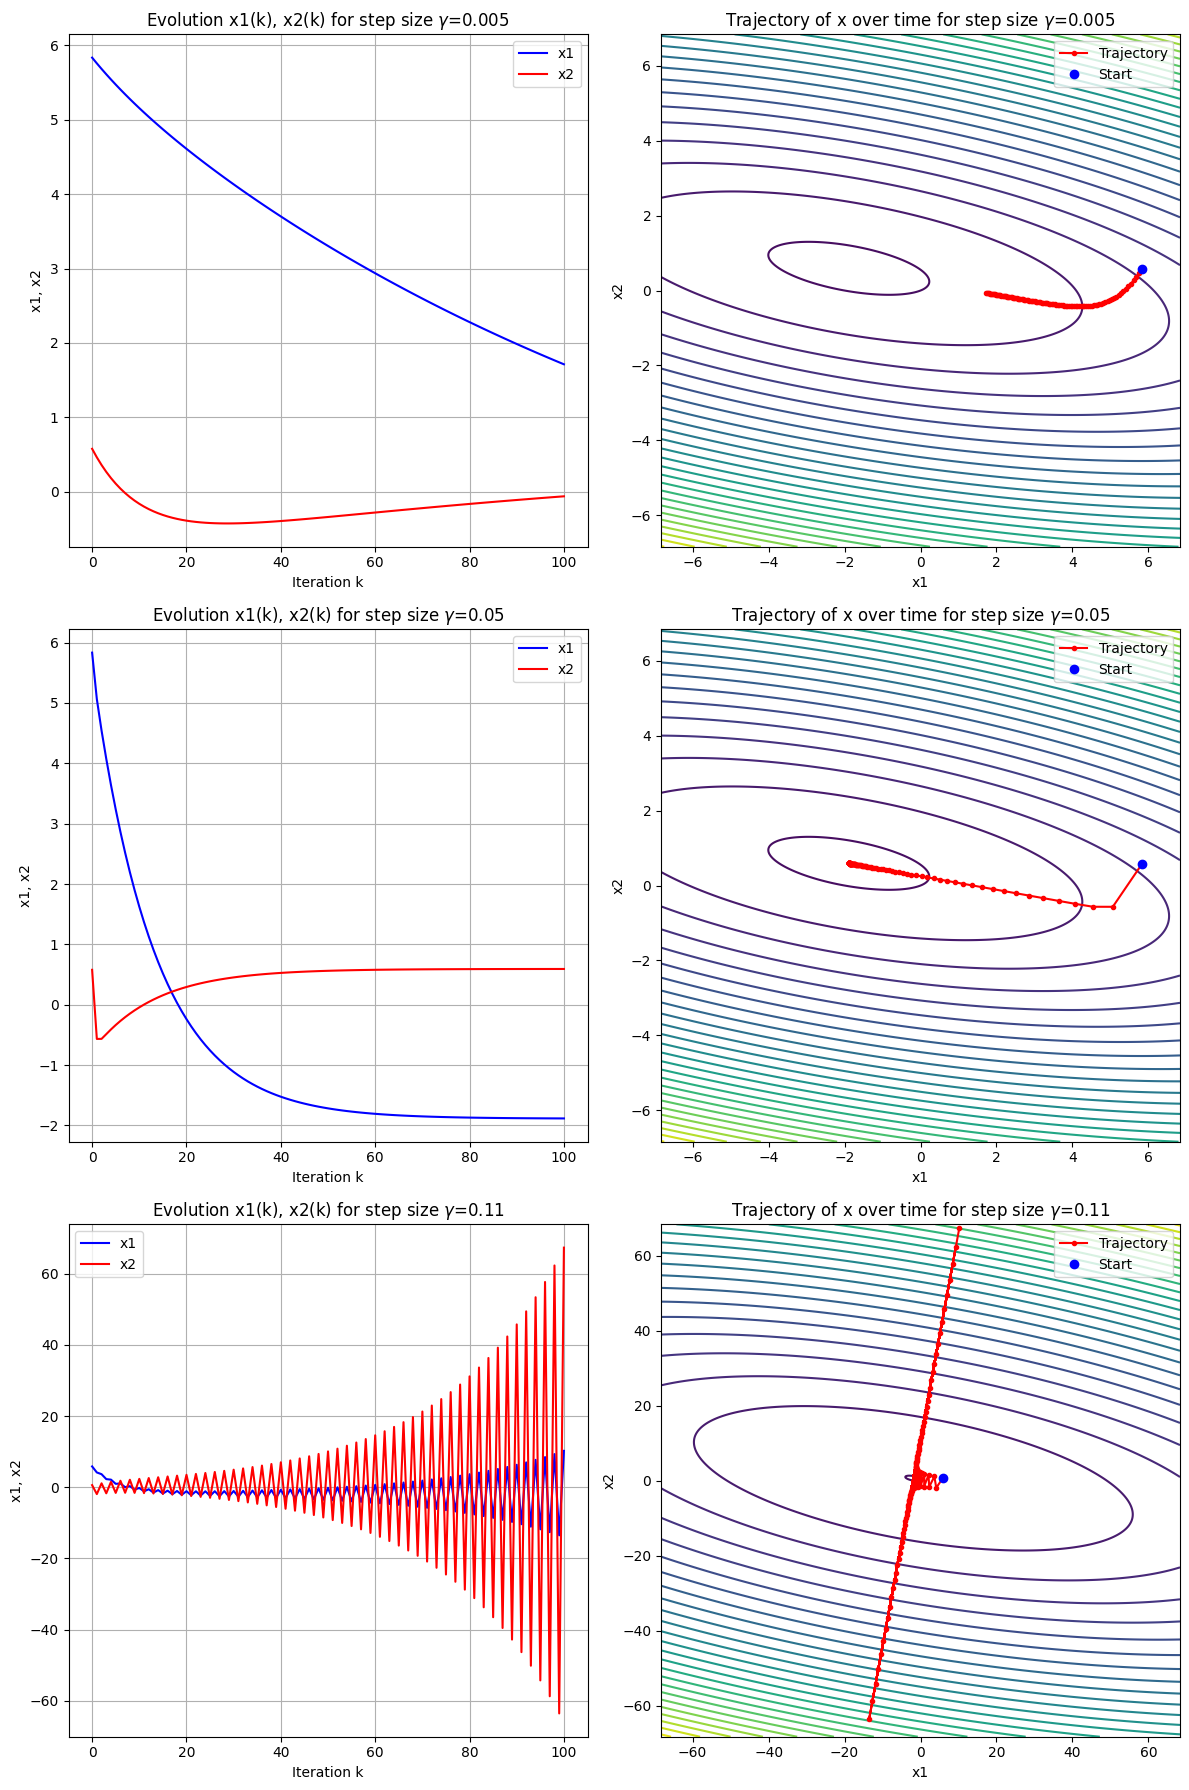

In [163]:
# Calculate the gradient of f (use the formula derived above)
def grad_f(x):
    x1, x2 = x
    df_dx1 = 2 * x1 + 3 * x2 + 2
    df_dx2 = 3 * x1 + 18 * x2 - 5
    return np.array([df_dx1, df_dx2])

# Run gradient descent
def gradient_descent(x0, gamma, n_iter):
    x = np.array(x0, dtype=float)
    x_history = [x.copy()]
    for _ in range(n_iter):
        # Calculate gradients and update x
        grad = grad_f(x)
        x = x - gamma * grad
        x_history.append(x.copy())
    # Return the evolution of x over time
    return np.array(x_history)

# Parameters for GD
x0 = np.random.uniform(-10, 10, (2)) # Start at random
n_iter = 100                         # Number of iterations
gammas = [0.005, 0.05, 0.11]         # Step sizes
labels = [r"$\gamma$=0.005", r"$\gamma$=0.05", r"$\gamma$=0.11"] # Labels for the plot

# Plot the 3 GD cases
# For each gamma, show how x1(k) and x2(k) evolve and the contour with the trajectory
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
for i, gamma in enumerate(gammas):
    x_history = gradient_descent(x0, gamma, n_iter)
    print(f"Final x for step size {gammas[i]}: {x_history[-1][0]:.3f}, {x_history[-1][1]:.3f}")
    # Evolution of x1 and x2 over k
    k = np.arange(n_iter + 1)
    axes[i, 0].plot(k, x_history[:, 0], "b-", label="x1")
    axes[i, 0].plot(k, x_history[:, 1], "r-", label="x2")
    axes[i, 0].set_xlabel("Iteration k")
    axes[i, 0].set_ylabel("x1, x2")
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    axes[i, 0].set_title(f"Evolution x1(k), x2(k) for step size {labels[i]}")

    # Contour with trajectory
    max_lim = np.max(np.abs(x_history)) + 1
    x1 = np.linspace(-max_lim, max_lim, 1000)
    x2 = np.linspace(-max_lim, max_lim, 1000)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2)
    axes[i, 1].contour(X1, X2, Z, levels=25, cmap="viridis")
    axes[i, 1].plot(x_history[:, 0], x_history[:, 1], "ro-", markersize=3, label="Trajectory")
    axes[i, 1].plot(x0[0], x0[1], "bo", label="Start")
    axes[i, 1].set_xlabel("x1")
    axes[i, 1].set_ylabel("x2")
    axes[i, 1].legend()
    axes[i, 1].set_title(f"Trajectory of x over time for step size {labels[i]}")

# Adjust layout and display
plt.tight_layout()
plt.show()

#### (c)
Now the problem is:
\begin{align*}
    \min_{x_1, x_2} \text{ }& x_1^2 + 3x_1x_2 + 9x_2^2 +2x_1 -5x_2 \\
    \text{subject to } & 2x_1 + x_2 \geq 3 \\
    & x_1 + 2x_2 \geq 3 \\
    & x_1 \geq 0 \\
    & x_2 \geq 0
\end{align*}

Just as suggested, the following is the gradient projection algorithm, which is the same as above, but at every step, the point $x = (x_1, x_2)$ is projected onto the feasible set.

Now, to calculate the projections, we know the feasible set is in the first quadrant and above the lines 
- $2x_1 + x_2 = 3$
- $x_1 + 2x_2 = 3$

Next, the lines normal to these lines are (at the boundary points):
- $-0.5x_1 + x_2 = 3$ perpendicular to $2x_1 + x_2 = 3$ at $(0, 3)$
- $x_1 - 0.5x_2 = 3$ perpendicular to $x_1 + 2x_2 = 3$ at $(3, 0)$

We need these, because the projection rules can be graphically illustrated as follows:

![Projection Rules](./projection_rules.png)

From the figure above, there are 7 distinct cases for projection when the point is outside the feasible set (of course, if the point is inside the feasible set, the projection is the point itself). The projection rules are as follows:
- Case 1: $x_1 < 0$ and $x_2 \geq 3 \Rightarrow$ project to $(0, x_2)$
- Case 2: $x_2 < 3$ and $-0.5x_1 + x_2 \geq 3 \Rightarrow$ project to $(0, 3)$
- Case 3: $-0.5x_1 + x_2 < 3$ and $-0.5x_1 + x_2 \geq 0.5 \Rightarrow$ project to $(\frac{x_1 -2x_2 + 6}{5}, \frac{-2x_1+4x_2+3}{5})$ (onto the line $2x_1 + x_2 = 3$, perpendicular projection)
- Case 4: $-0.5x_1 + x_2 < 0.5$ and $x_1 - 0.5x_2 \leq 0.5 \Rightarrow$ project to $(1, 1)$
- Case 5: $x_1 - 0.5x_2 > 0.5$ and $x_1 - 0.5x_2 \leq 3 \Rightarrow$ project to $(\frac{4x_1 -2x_2 + 3}{5}, \frac{-2x_1+x_2+6}{5})$ (onto the line $x_1 + 2x_2 = 3$, perpendicular projection)
- Case 6: $x_1 - 0.5x_2 > 3$ and $x_1 < 3 \Rightarrow$ project to $(3, 0)$
- Case 7: $x_2 < 0$ and $x_1 \geq 3 \Rightarrow$ project to $(x_1, 0)$

With that, I added the projection function that implements these rules, and the rest remains the same. The code and results are below.

The step sizes used (found experimentally) are:
- Too small: $\gamma = 0.001$
- Too large: $\gamma = 10.0$
- Just right: $\gamma = 0.05$

Final x for step size 0.001: 0.582, 1.835
Final x for step size 0.05: 1.286, 0.857
Final x for step size 10: 1.000, 1.000


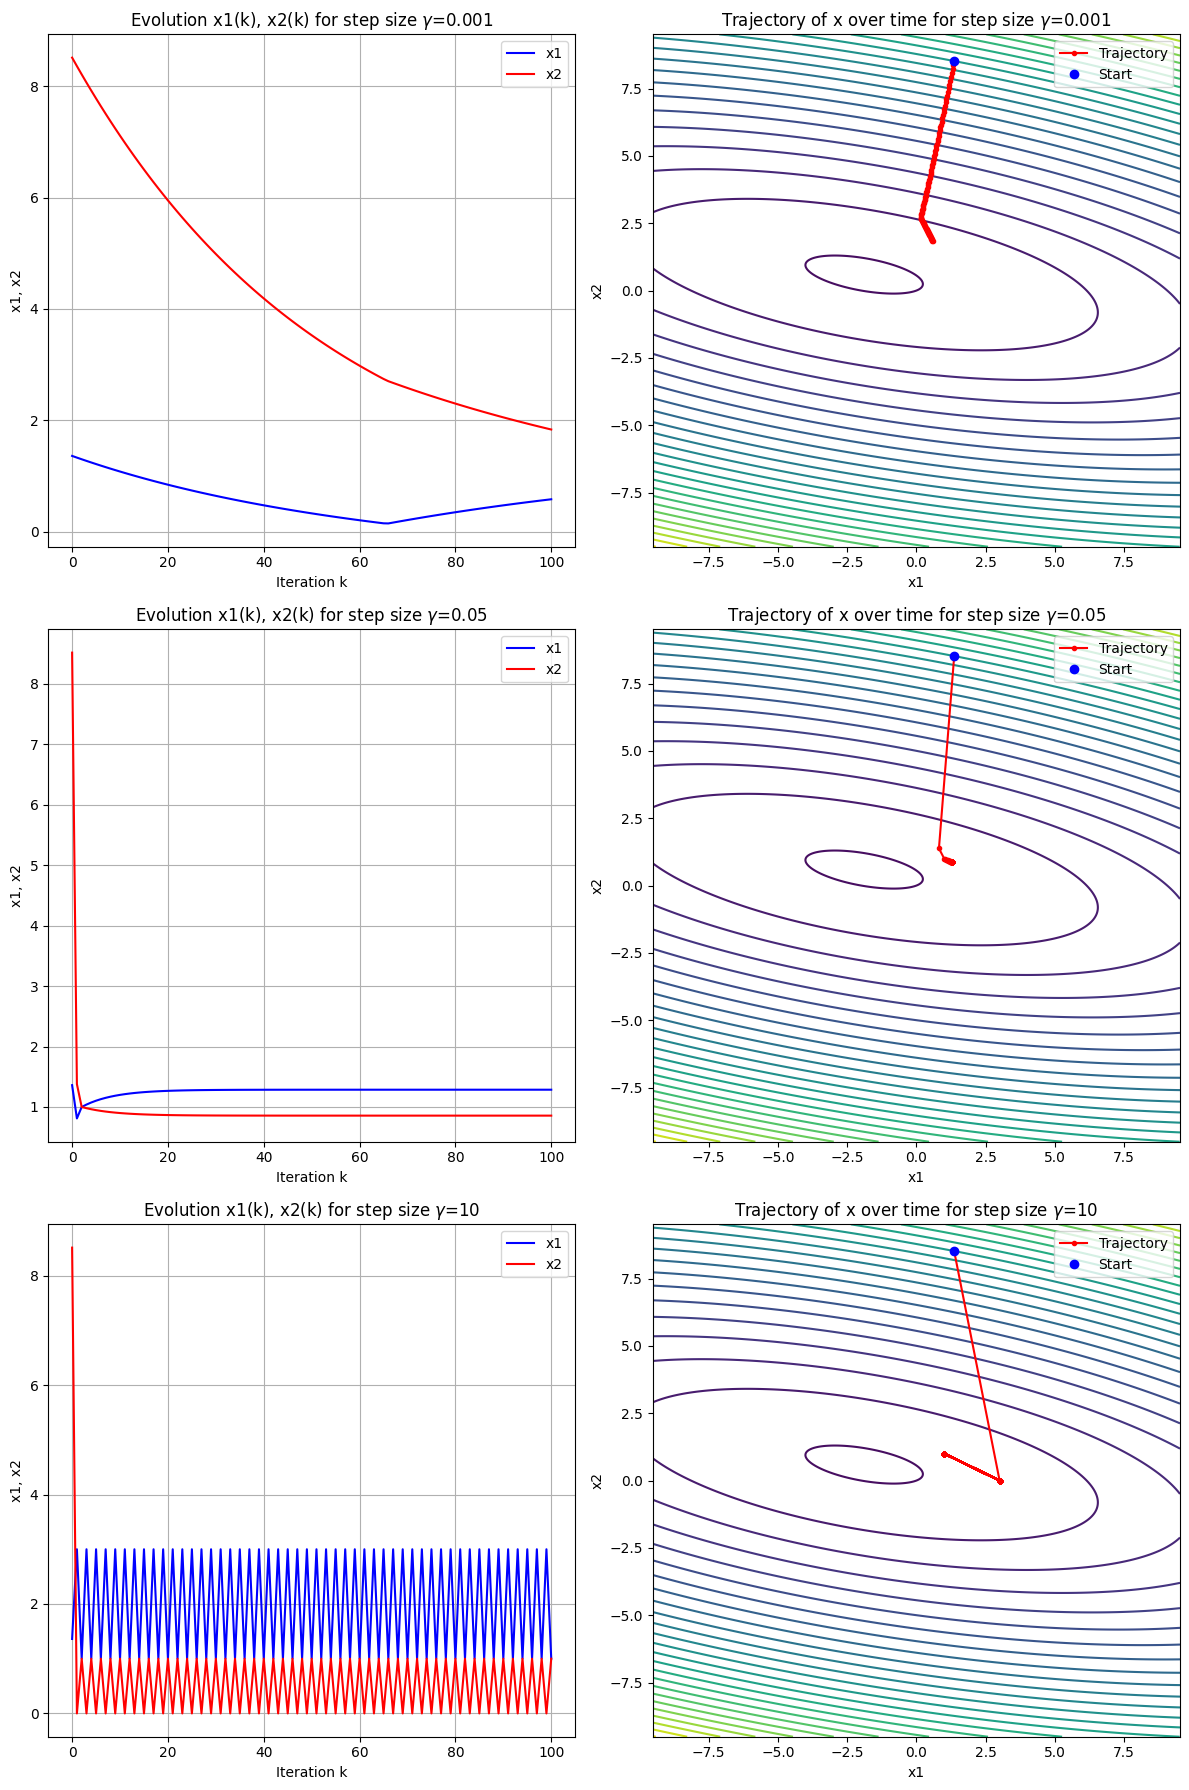

In [164]:
# Project onto the feasible set
def project(x):
    x1, x2 = x
    if x1 >= 0 and x2 >= 0 and 2 * x1 + x2 >= 3 and x1 + 2 * x2 >= 3:
        return x
    # The next two are the most likely to be used so put them first
    elif x1 < 0 and x2 >= 3:
        return np.array([0, x2])
    elif x2 < 0 and x1 >= 3:
        return np.array([x1, 0])
    # Then the smaller regions in order of size (based on probability for optimality)
    elif -0.5 * x1 + x2 <= 0.5 and x1 - 0.5 * x2 <= 0.5:
        return np.array([1, 1])
    elif x2 <= 3 and -0.5 * x1 + x2 >= 3:
        return np.array([0, 3])
    elif x1 <= 3 and x1 - 0.5 * x2 >= 3:
        return np.array([3, 0])
    elif -0.5 * x1 + x2 <= 3 and -0.5 * x1 + x2 >= 0.5:
        return np.array([(x1 - 2 * x2 + 6) / 5, (-2 * x1 + 4 * x2 + 3) / 5])
    elif x1 - 0.5 * x2 >= 0.5 and x1 - 0.5 * x2 <= 3:
        return np.array([(4 * x1 - 2 * x2 + 3) / 5, (-2 * x1 + x2 + 6) / 5])

# Run projected gradient descent
def projected_gradient_descent(x0, gamma, n_iter):
    x = np.array(x0, dtype=float)
    x_history = [x.copy()]
    for _ in range(n_iter):
        # Calculate gradients and update x
        grad = grad_f(x)
        x = x - gamma * grad
        x = project(x)  # Project onto the feasible set
        x_history.append(x.copy())
    # Return the evolution of x over time
    return np.array(x_history)

# Parameters for projected-GD
x0 = project(np.random.uniform(-10, 10, (2)))  # Start at random
n_iter = 100                         # Number of iterations
gammas = [0.001, 0.05, 10]         # Step sizes
labels = [r"$\gamma$=0.001", r"$\gamma$=0.05", r"$\gamma$=10"]  # Labels for the plot

# Plot the 3 projected-GD cases
# For each gamma, show how x1(k) and x2(k) evolve and the contour with the trajectory
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
for i, gamma in enumerate(gammas):
    x_history = projected_gradient_descent(x0, gamma, n_iter)
    print(f"Final x for step size {gammas[i]}: {x_history[-1][0]:.3f}, {x_history[-1][1]:.3f}")
    # Evolution of x1 and x2 over k
    k = np.arange(n_iter + 1)
    axes[i, 0].plot(k, x_history[:, 0], "b-", label="x1")
    axes[i, 0].plot(k, x_history[:, 1], "r-", label="x2")
    axes[i, 0].set_xlabel("Iteration k")
    axes[i, 0].set_ylabel("x1, x2")
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    axes[i, 0].set_title(f"Evolution x1(k), x2(k) for step size {labels[i]}")

    # Contour with trajectory
    max_lim = np.max(np.abs(x_history)) + 1
    x1 = np.linspace(-max_lim, max_lim, 1000)
    x2 = np.linspace(-max_lim, max_lim, 1000)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2)
    axes[i, 1].contour(X1, X2, Z, levels=25, cmap="viridis")
    axes[i, 1].plot(x_history[:, 0], x_history[:, 1], "ro-", markersize=3, label="Trajectory")
    axes[i, 1].plot(x0[0], x0[1], "bo", label="Start")
    axes[i, 1].set_xlabel("x1")
    axes[i, 1].set_ylabel("x2")
    axes[i, 1].legend()
    axes[i, 1].set_title(f"Trajectory of x over time for step size {labels[i]}")

# Adjust layout and display
plt.tight_layout()
plt.show()

#### (d)

The lagrangian is:
\begin{equation*}
    \mathcal L(x_1, x_2, \lambda_1, \lambda_2) = x_1^2 + 3x_1x_2 + 9x_2^2 +2x_1 -5x_2 + \lambda_1(3 - 2x_1 - x_2) + \lambda_2(3 - x_1 - 2x_2)
\end{equation*}

(the $x_1 >= 0$ and $x_2 >= 0$ are not included in the lagrangian, and are enforced separately through projection).

The lagrangian can be rewritten as:
\begin{equation*}
    \mathcal L(x_1, x_2, \lambda_1, \lambda_2) = x_1^2  + 3 x_1x_2 + 9 x_2^2 + (2 - 2\lambda_1 - \lambda_2)x_1 + (-5 - \lambda_1 - 2\lambda_2)x_2 + 3\lambda_1 + 3\lambda_2
\end{equation*}
This is a convex quadratic function in $x_1$ and $x_2$, so we can find the $x_1$ and $x_2$ that minimize the lagrangian by setting the gradient to zero. The gradient is:
\begin{equation*}
    \nabla \mathcal L(x_1, x_2, \lambda_1, \lambda_2) = \begin{bmatrix}
        2x_1 + 3x_2 + 2 - 2\lambda_1 - \lambda_2 \\ 
        3x_1 + 18x_2 - 5 - \lambda_1 - 2\lambda_2
    \end{bmatrix} = \begin{bmatrix}
        0 \\ 0
    \end{bmatrix}
\end{equation*}
Solving this, we get:
\begin{align*}
    x_1^* &= \frac{11\lambda_1 + 4\lambda_2 - 17}{9} \\
    x_2^* &= \frac{-4\lambda_1 + \lambda_2 + 16}{27}
\end{align*}
Also, we have the non-negativity constraints, so the actual optimal values of $x_1$ and $x_2$ are the projections of the above onto the first quadrant:
- If $x_1^* < 0$, $x_1^* = 0$, minimize $\mathcal L(0, x_2^*, \lambda_1, \lambda_2)$ over $x_2^* \Rightarrow x_2^* = \frac{5 + \lambda_1 + 2\lambda_2}{18}$
- If $x_2^* < 0$, $x_2^* = 0$, minimize $\mathcal L(x_1^*, 0, \lambda_1, \lambda_2)$ over $x_1^* \Rightarrow x_1^* = \frac{-2 + 2\lambda_1 + \lambda_2}{2}$

Given that, the dual problem is
\begin{align*}
    \max_{\lambda_1, \lambda_2} \text{ }&g(\lambda_1, \lambda_2) = \max_{\lambda_1, \lambda_2} \mathcal L(x_1^*, x_2^*, \lambda_1, \lambda_2) \\
    \text{subject to } &\lambda_1 \geq 0 \\
    &\lambda_2 \geq 0 \\
\end{align*}

Then, the projected gradient ascent maximizes the $g(\lambda_1, \lambda_2)$ by projecting back to $\lambda_1 \geq 0$ and $\lambda_2 \geq 0$. 

The gradient of $g(\lambda_1, \lambda_2)$ is:
\begin{equation*}
    \nabla g(\lambda_1, \lambda_2) = \begin{bmatrix}
        3 - 2x_1^* - x_2^* \\
        3 - x_1^* - 2x_2^*
    \end{bmatrix}
\end{equation*}

Given that, I use the above formula in the projected grdient ascent (along with projecting the x back to the feasible set). The implementation is below.

The step sizes used (found experimentally) are:
- Too small: $\gamma = 0.01$
- Too large: $\gamma = 3.0$
- Just right: $\gamma = 0.3$

Final x for step size 0.01: 1.309, 0.412
Final lambdas for step size 0.01: 1.788, 2.279

Final x for step size 0.3: 1.286, 0.857
Final lambdas for step size 0.3: 0.000, 7.143

Final x for step size 3.0: 0.000, 0.000
Final lambdas for step size 3.0: 899.640, 898.730



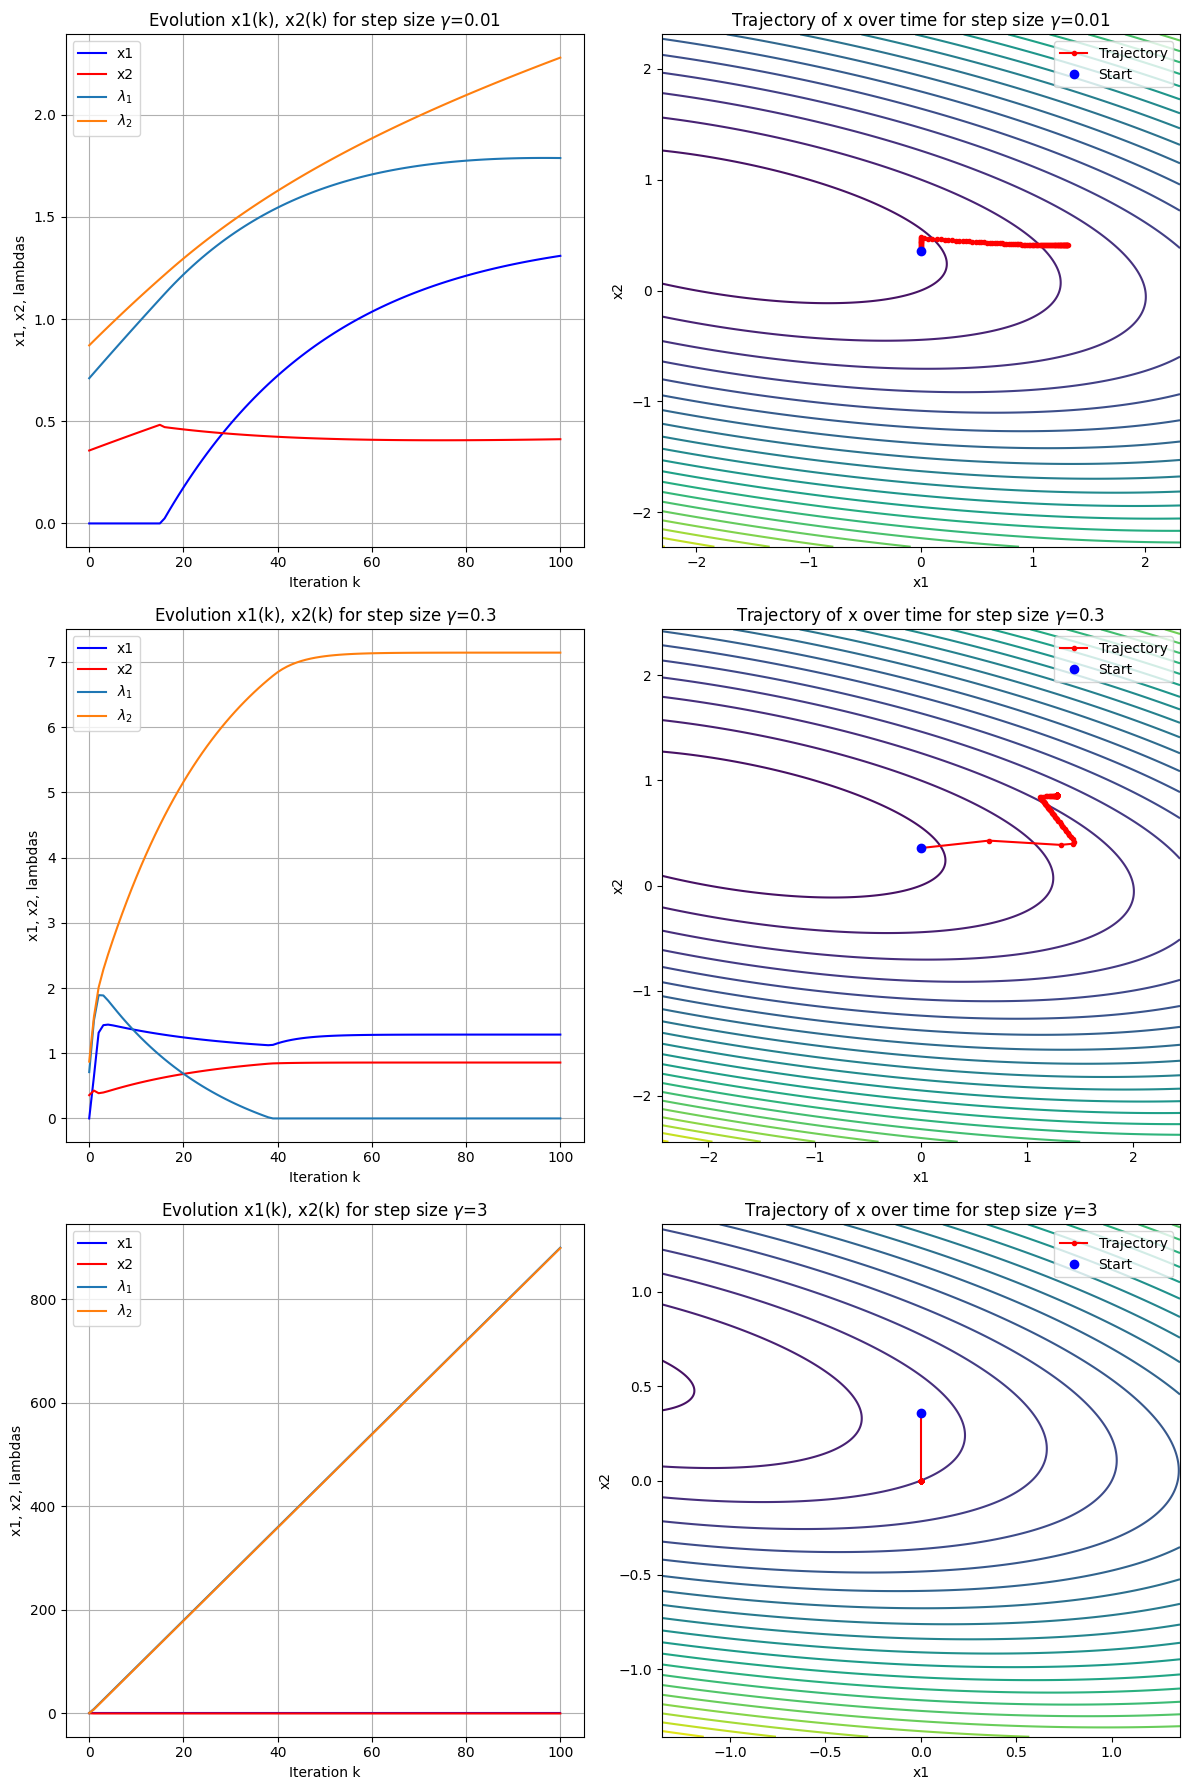

In [165]:
def grad_lambda(x):
    x1_star, x2_star = x
    dg_dlambda1 = 3 - 2 * x1_star - x2_star
    dg_dlambda2 = 3 - x1_star - 2 * x2_star
    return np.array([dg_dlambda1, dg_dlambda2])

def calc_x_star(lambdas):
    lambda1, lambda2 = lambdas
    x1_star = (11 * lambda1 + 4 * lambda2 - 17) / 9
    x2_star = (-4 * lambda1 + lambda2 + 16) / 27
    if x1_star < 0:
        x1_star = 0
        x2_star = max(0, (5 * lambda1 + lambda2 + 2) / 18)
    if x2_star < 0:
        x1_star = max(0, (-2 * lambda1 + 2 * lambda2 + 1) / 2)
        x2_star = 0
    if x1_star < 0 and x2_star < 0:
        x1_star = 0
        x2_star = 0

    return np.array([x1_star, x2_star])

def project_lambda(lambdas):
    lambda1, lambda2 = lambdas
    if lambda1 < 0:
        lambda1 = 0
    if lambda2 < 0:
        lambda2 = 0
    return np.array([lambda1, lambda2])

# Run projected gradient descent
def projected_dual_gradient_descent(lambdas0, gamma, n_iter):
    lambdas = np.array(lambdas0, dtype=float)
    x_history = []
    lambdas_history = [lambdas.copy()]

    for _ in range(n_iter):
        # Calculate gradients and update lambdas
        x = calc_x_star(lambdas)
        x_history.append(x.copy())
        grad = grad_lambda(x)
        lambdas = lambdas + gamma * grad   # Max -> ascent
        lambdas = project_lambda(lambdas)  # Project onto the feasible set
        lambdas_history.append(lambdas.copy())
    x_history.append(calc_x_star(lambdas))  # Final x_star
    # Return the evolution of lambdas over time
    return np.array(lambdas_history), np.array(x_history)

# Parameters for projected-GD
lambdas0 = np.random.uniform(0, 10, (2))  # Start at random
n_iter = 100  # Number of iterations
gammas = [0.01, 0.3, 3.0]  # Step sizes
labels = [r"$\gamma$=0.01", r"$\gamma$=0.3", r"$\gamma$=3"]  # Labels for the plot

# Plot the 3 projected-GD cases
# For each gamma, show how x1(k) and x2(k) evolve and the contour with the trajectory
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
for i, gamma in enumerate(gammas):
    lambdas_history, x_history = projected_dual_gradient_descent(lambdas0, gamma, n_iter)
    print(f"Final x for step size {gammas[i]}: {x_history[-1][0]:.3f}, {x_history[-1][1]:.3f}")
    print(f"Final lambdas for step size {gammas[i]}: {lambdas_history[-1][0]:.3f}, {lambdas_history[-1][1]:.3f}")
    print()
    # Evolution of x1 and x2 over k
    k = np.arange(n_iter + 1)
    axes[i, 0].plot(k, x_history[:, 0], "b-", label="x1")
    axes[i, 0].plot(k, x_history[:, 1], "r-", label="x2")
    axes[i, 0].plot(k, lambdas_history[:, 0], "-", label=r"$\lambda_1$")
    axes[i, 0].plot(k, lambdas_history[:, 1], "-", label=r"$\lambda_2$")
    axes[i, 0].set_xlabel("Iteration k")
    axes[i, 0].set_ylabel("x1, x2, lambdas")
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    axes[i, 0].set_title(f"Evolution x1(k), x2(k) for step size {labels[i]}")

    # Contour with trajectory
    max_lim = np.max(np.abs(x_history)) + 1
    x1 = np.linspace(-max_lim, max_lim, 1000)
    x2 = np.linspace(-max_lim, max_lim, 1000)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2)
    axes[i, 1].contour(X1, X2, Z, levels=25, cmap="viridis")
    axes[i, 1].plot(
        x_history[:, 0], x_history[:, 1], "ro-", markersize=3, label="Trajectory"
    )
    axes[i, 1].plot(x_history[0, 0], x_history[0, 1], "bo", label="Start")
    axes[i, 1].set_xlabel("x1")
    axes[i, 1].set_ylabel("x2")
    axes[i, 1].legend()
    axes[i, 1].set_title(f"Trajectory of x over time for step size {labels[i]}")

# Adjust layout and display
plt.tight_layout()
plt.show()

#### (e)